In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfaus=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/phase project/2nd phase/database_AUS.csv')
dfind=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/phase project/2nd phase/database_IND.csv')
dfus=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/phase project/2nd phase/database_USA.csv')

In [3]:
df=pd.concat([dfaus,dfind,dfus],axis=0)

In [4]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11874,USA,United States of America,Zotos International WPGF,USA0057648,3.40,42.8869,-76.9683,Wind,NaN,NaN,...,2019.0,3.671000,2.460150,2.489000,1.670000,1.233490,2.630000,1.211,U.S. Energy Information Administration,NaN
11875,USA,United States of America,Zumbro Community Solar Garden,USA0061574,1.00,44.3195,-92.6703,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,1.161000,1.589,U.S. Energy Information Administration,NaN
11876,USA,United States of America,Zumbro Solar Garden,USA0063426,0.00,44.0460,-92.7600,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11877,USA,United States of America,Zuni,USA0000478,0.00,39.7373,-105.0170,NaN,NaN,NaN,...,2019.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,U.S. Energy Information Administration,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13298 entries, 0 to 11878
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   13298 non-null  object 
 1   country_long              13298 non-null  object 
 2   name                      13298 non-null  object 
 3   gppd_idnr                 13298 non-null  object 
 4   capacity_mw               13292 non-null  float64
 5   latitude                  13220 non-null  float64
 6   longitude                 13220 non-null  float64
 7   primary_fuel              11294 non-null  object 
 8   other_fuel1               1628 non-null   object 
 9   other_fuel2               270 non-null    object 
 10  other_fuel3               92 non-null     object 
 11  commissioning_year        10654 non-null  float64
 12  owner                     12705 non-null  object 
 13  source                    13298 non-null  object 
 14  url        

In [6]:
df.drop(['estimated_generation_gwh','wepp_id','other_fuel1','other_fuel2','other_fuel3'],axis=1,inplace=True)

In [7]:
df.drop(['url','gppd_idnr','year_of_capacity_data'],axis=1,inplace=True)

In [8]:
df.drop('name',axis=1,inplace=True)

In [9]:
df.nunique()

country                       3
country_long                  3
capacity_mw                2304
latitude                  12385
longitude                 12733
primary_fuel                 14
commissioning_year         1936
owner                      5877
source                      206
geolocation_source            5
generation_gwh_2013        5616
generation_gwh_2014        6306
generation_gwh_2015        6692
generation_gwh_2016        7150
generation_gwh_2017        7630
generation_gwh_2018        8040
generation_gwh_2019        8368
generation_data_source        3
dtype: int64

In [10]:
for i in df.columns:
  print('*'*25)
  print(df[i].value_counts())

*************************
country
USA    11879
IND      907
AUS      512
Name: count, dtype: int64
*************************
country_long
United States of America    11879
India                         907
Australia                     512
Name: count, dtype: int64
*************************
capacity_mw
0.0      2030
5.0       552
1.0       534
2.0       479
1.5       267
         ... 
772.0       1
119.1       1
251.8       1
153.9       1
596.7       1
Name: count, Length: 2304, dtype: int64
*************************
latitude
39.4360    7
38.3026    6
34.7231    5
36.7160    5
42.2060    5
          ..
41.6229    1
37.2367    1
42.4875    1
40.4433    1
39.7373    1
Name: count, Length: 12385, dtype: int64
*************************
longitude
-76.2200     7
-121.2958    6
-114.6460    6
-118.2897    5
-121.4128    4
            ..
-87.7350     1
-87.6690     1
-152.4042    1
-77.7048     1
-112.0478    1
Name: count, Length: 12733, dtype: int64
*************************
primary_fuel
So

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13298 entries, 0 to 11878
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 13298 non-null  object 
 1   country_long            13298 non-null  object 
 2   capacity_mw             13292 non-null  float64
 3   latitude                13220 non-null  float64
 4   longitude               13220 non-null  float64
 5   primary_fuel            11294 non-null  object 
 6   commissioning_year      10654 non-null  float64
 7   owner                   12705 non-null  object 
 8   source                  13298 non-null  object 
 9   geolocation_source      13275 non-null  object 
 10  generation_gwh_2013     7170 non-null   float64
 11  generation_gwh_2014     7534 non-null   float64
 12  generation_gwh_2015     7993 non-null   float64
 13  generation_gwh_2016     8701 non-null   float64
 14  generation_gwh_2017     9292 non-null   flo

In [12]:
df.drop('country_long',axis=1,inplace=True)

In [13]:
cat_col=[]
num_col=[]
for i in df.columns:
  if df[i].dtype=='object':
    cat_col.append(i)
  if df[i].dtype=='int' or df[i].dtype=='float':
    num_col.append(i)


In [14]:
cat_col

['country',
 'primary_fuel',
 'owner',
 'source',
 'geolocation_source',
 'generation_gwh_2019',
 'generation_data_source']

In [15]:
df['generation_gwh_2019'].dtype

dtype('O')

In [16]:
df[df['generation_gwh_2019'].isnull()]

,country,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,AUS,0.11,-34.9387,138.5377,Solar,2011.0,Adelaide Airport Ltd,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,1.00,-34.9453,138.5882,Solar,NaN,Adelaide Showgrounds,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,21.60,-35.0641,117.7977,Wind,NaN,Verve Energy,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator
3,AUS,0.24,-23.7966,133.8971,Solar,2004.0,Alice Springs Airport,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,4.00,-34.5509,138.7659,Oil,2015.0,Energy Response,Australian Renewable Energy Mapping Infrastruc...,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11850,USA,0.00,34.5033,-82.2521,NaN,NaN,York Solar,U.S. Energy Information Administration,U.S. Energy Information Administration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11852,USA,0.00,34.0047,-118.0684,NaN,NaN,Southern California Edison Co,U.S. Energy Information Administration,U.S. Energy Information Administration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11858,USA,0.00,35.2525,-89.2514,NaN,NaN,Invenergy Services LLC,U.S. Energy Information Administration,U.S. Energy Information Administration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11876,USA,0.00,44.0460,-92.7600,NaN,NaN,Zumbro Garden LLC,U.S. Energy Information Administration,U.S. Energy Information Administration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
from scipy import stats

In [18]:
df['generation_gwh_2019'] = pd.to_numeric(df['generation_gwh_2019'], errors='coerce')
df['generation_gwh_2019'] = df['generation_gwh_2019'].fillna(df['generation_gwh_2019'].mode()[0])

In [19]:
cat_col=['country',
 'primary_fuel',
 'owner',
 'source',
 'geolocation_source',
 'generation_gwh_2019',
 'generation_data_source']

In [20]:
for i in cat_col:
  df[i]=df[i].fillna(df[i].mode()[0])
    #df['primary_fuel']=df['primary_fuel'].fillna(df['primary_fuel'].mode()[0])

In [21]:
df['generation_gwh_2019'] = df['generation_gwh_2019'].astype('category')

In [22]:
df['generation_gwh_2019'] = df['generation_gwh_2019'].astype('float')

In [23]:
df['capacity_mw']=df['capacity_mw'].fillna(df['capacity_mw'].median())

In [24]:
df['latitude']=df['latitude'].fillna(df['latitude'].interpolate())

In [25]:
df['longitude']=df['longitude'].fillna(df['longitude'].interpolate())

In [26]:
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].mode()[0])

In [27]:
df.dtypes

country                    object
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
commissioning_year        float64
owner                      object
source                     object
geolocation_source         object
generation_gwh_2013       float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_gwh_2019       float64
generation_data_source     object
dtype: object

In [28]:
for i in cat_col:
  print(df[i].dtype)
  print(df[i].value_counts())
  print(df[i].isnull().sum())
  print('**'*25)
  print('\n')

for i in num_col:
  print(df[i].dtype)
  print(df[i].value_counts())
  print(df[i].isnull().sum())
  print('**'*25)


object
country
USA    11879
IND      907
AUS      512
Name: count, dtype: int64
0
**************************************************


object
primary_fuel
Solar           5484
Gas             2031
Hydro           1783
Wind            1340
Oil              961
Waste            595
Coal             572
Biomass          230
Storage          104
Nuclear           72
Geothermal        65
Cogeneration      34
Other             16
Petcoke           11
Name: count, dtype: int64
0
**************************************************


object
owner
Cypress Creek Renewables                791
Sustainable Power Group  LLC             99
Pacific Gas & Electric Co.               90
Southern California Edison Co            86
Consolidated Edison Development Inc.     79
                                       ... 
Exxon Mobil Corp                          1
Pure Hedge LLC                            1
LaPorte Power  LLC                        1
Evonik Degussa Corporation                1
Zumbro Garden LLC

In [29]:
num_col

['capacity_mw',
 'latitude',
 'longitude',
 'commissioning_year',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018']

In [30]:
num_col=['capacity_mw',
 'latitude',
 'longitude',
 'commissioning_year',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018']

In [31]:
for i in num_col:
  df[i]=df[i].fillna(df[i].median())

In [32]:
df.isnull().sum()

country                   0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
owner                     0
source                    0
geolocation_source        0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_gwh_2019       0
generation_data_source    0
dtype: int64

In [33]:
df.columns

Index(['country', 'capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'owner', 'source', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source'],
      dtype='object')

In [34]:
df['primary_fuel']

0        Solar
1        Solar
2         Wind
3        Solar
4          Oil
         ...  
11874     Wind
11875    Solar
11876    Solar
11877    Solar
11878      Gas
Name: primary_fuel, Length: 13298, dtype: object

<Axes: xlabel='primary_fuel', ylabel='count'>

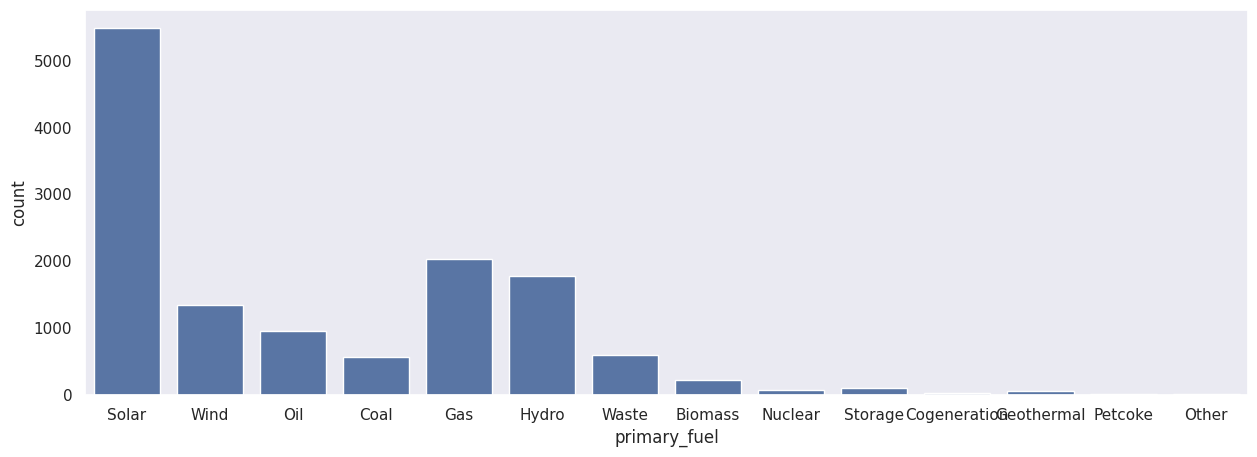

In [35]:
plt.figure(figsize=(15,5))
sns.set_theme(context='notebook',style='dark')
sns.countplot(df,x='primary_fuel')

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.77

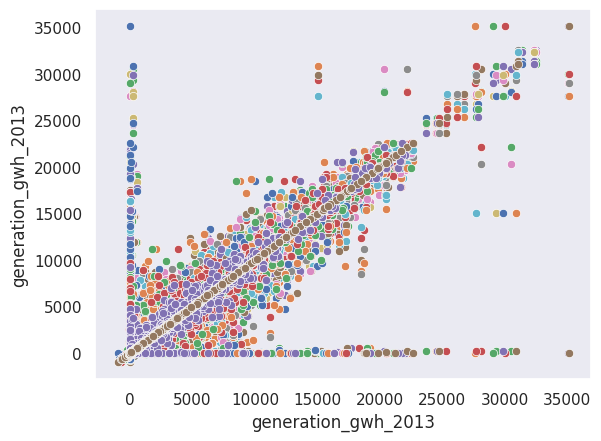

In [36]:
a=['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']
for i in a:
  for j in a:
    print(sns.scatterplot(df,x=j,y=i))

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2013'>

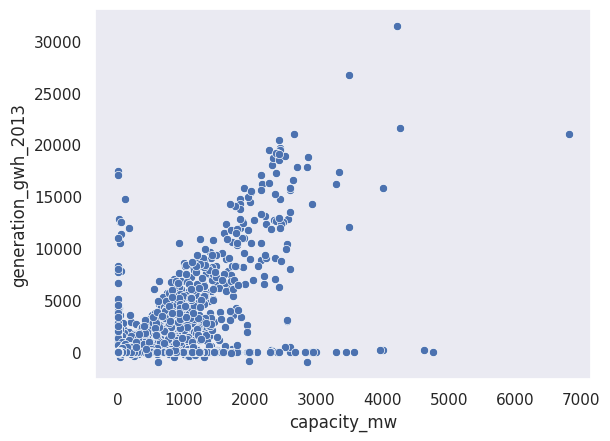

In [37]:
sns.scatterplot(df,x='capacity_mw',y='generation_gwh_2013')

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2014'>

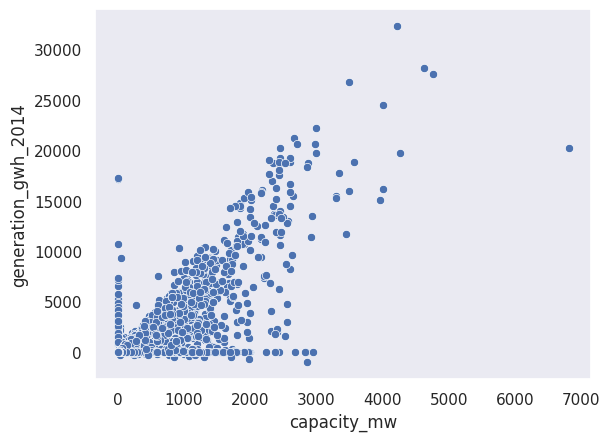

In [38]:
sns.scatterplot(df,x='capacity_mw',y='generation_gwh_2014')

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2015'>

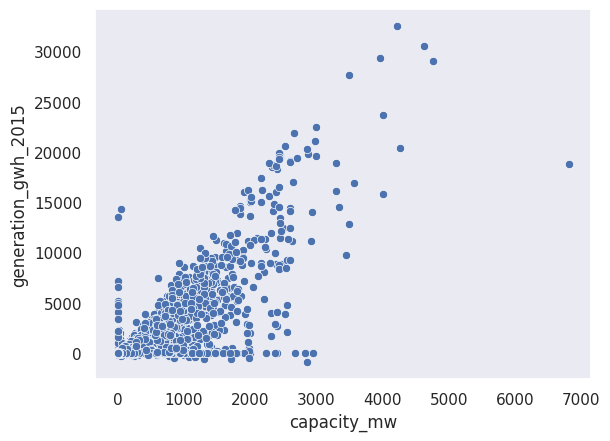

In [39]:
sns.scatterplot(df,x='capacity_mw',y='generation_gwh_2015')

<Axes: xlabel='generation_gwh_2013', ylabel='generation_gwh_2018'>

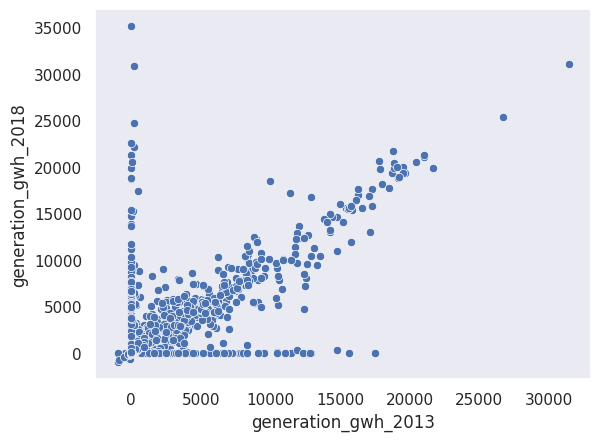

In [40]:
sns.scatterplot(df, x='generation_gwh_2013', y='generation_gwh_2018')

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2018'>

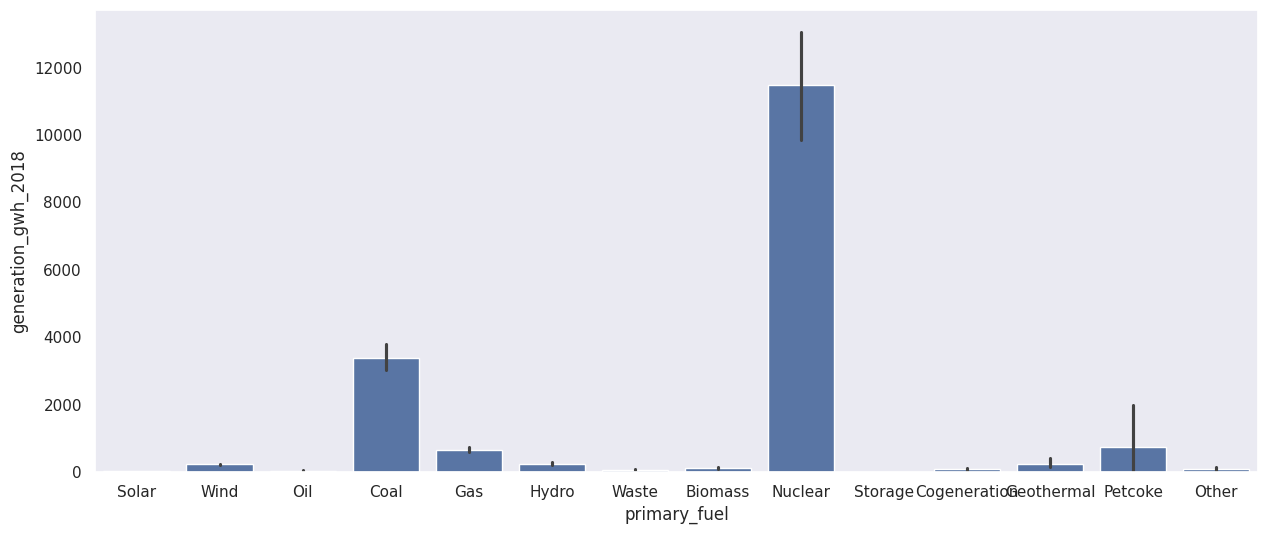

In [41]:
plt.figure(figsize=(15,6))
sns.barplot(df,x='primary_fuel',y='generation_gwh_2018')

<Axes: xlabel='geolocation_source', ylabel='generation_gwh_2019'>

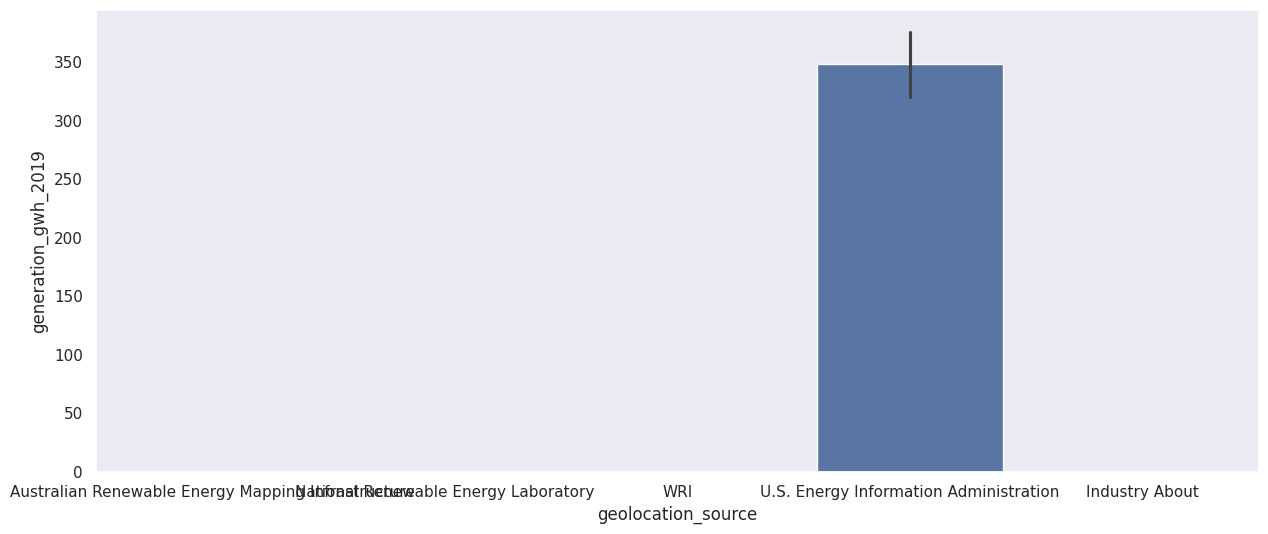

In [42]:
plt.figure(figsize=(15,6))
sns.barplot(df,x='geolocation_source',y='generation_gwh_2019')

<Axes: >

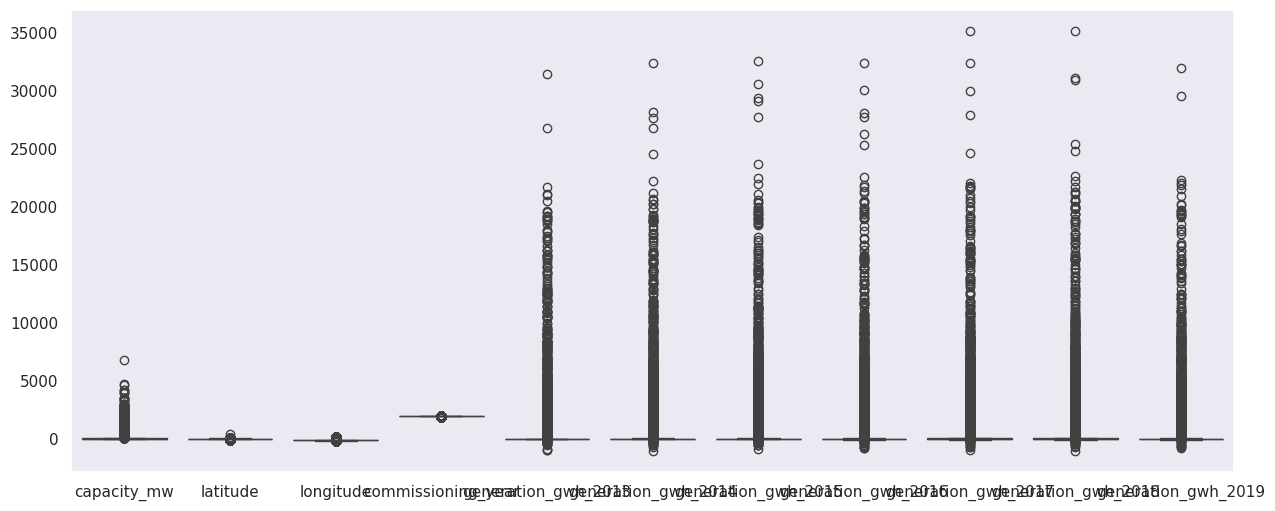

In [43]:
import seaborn as sns
plt.figure(figsize=(15,6))
sns.boxplot(data=df)

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cat_col:
  df[i]=le.fit_transform(df[i])

<Axes: >

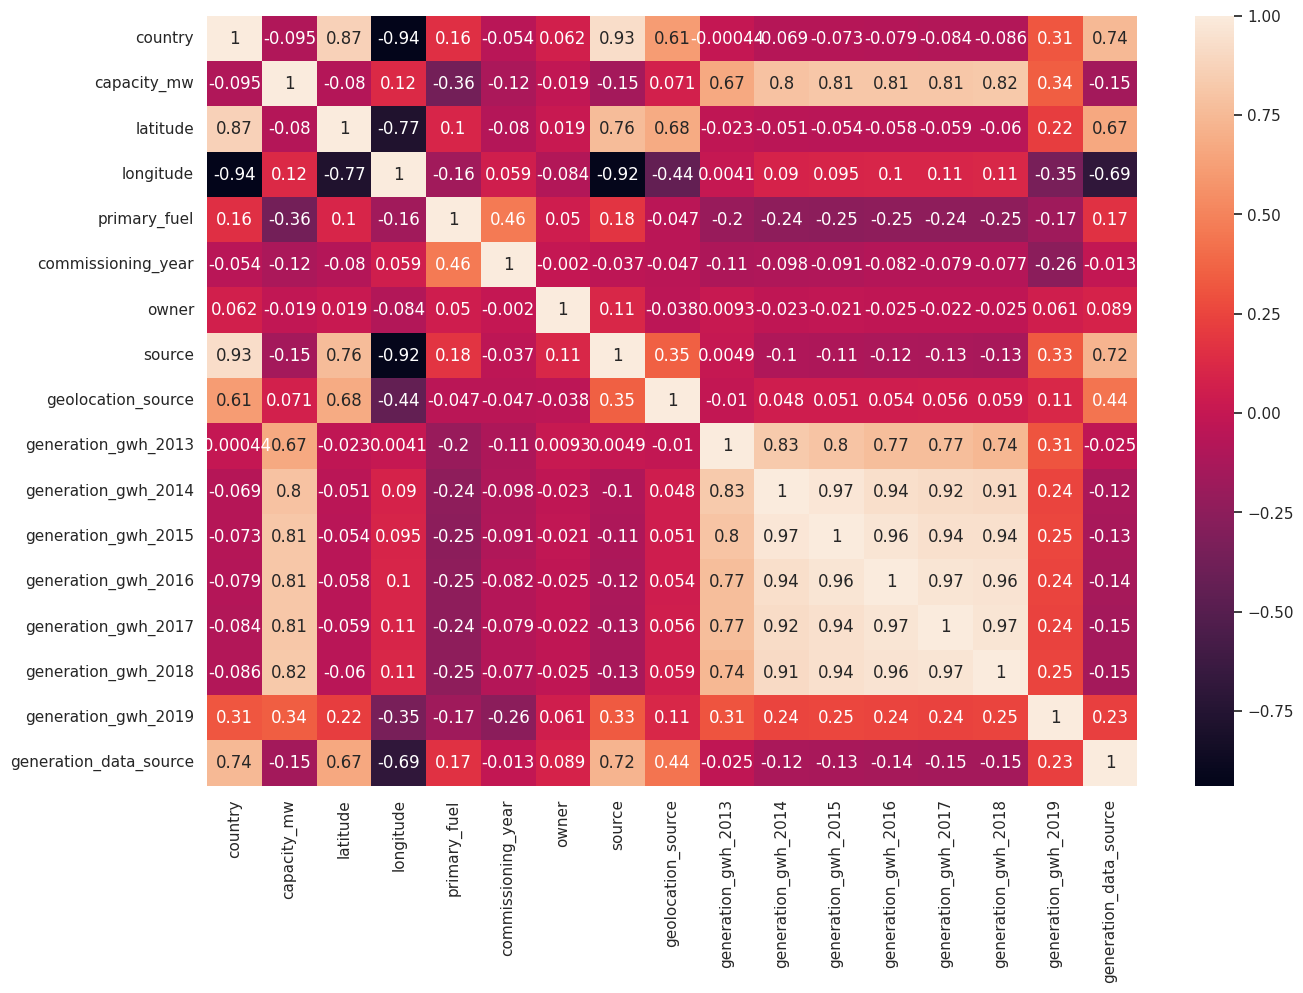

In [45]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [46]:
df

,country,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,0,0.11,-34.9387,138.5377,10,2011.00000,140,12,0,21.384500,22.241000,19.504000,15.410278,13.433861,12.308500,196,2
1,0,1.00,-34.9453,138.5882,10,2017.00000,141,12,0,21.384500,22.241000,19.504000,15.410278,13.433861,12.308500,196,2
2,0,21.60,-35.0641,117.7977,13,2017.00000,5533,12,0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,196,0
3,0,0.24,-23.7966,133.8971,10,2004.00000,203,12,0,21.384500,22.241000,19.504000,15.410278,13.433861,12.308500,196,2
4,0,4.00,-34.5509,138.7659,7,2015.00000,1940,12,0,21.384500,22.241000,19.504000,15.410278,13.433861,12.308500,196,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11874,2,3.40,42.8869,-76.9683,13,2012.00000,5872,185,3,3.671000,2.460150,2.489000,1.670000,1.233490,2.630000,736,2
11875,2,1.00,44.3195,-92.6703,10,2018.00000,5874,185,3,21.384500,22.241000,19.504000,15.410278,13.433861,1.161000,938,2
11876,2,0.00,44.0460,-92.7600,10,2017.00000,5873,185,3,21.384500,22.241000,19.504000,15.410278,13.433861,12.308500,196,2
11877,2,0.00,39.7373,-105.0170,10,2017.00000,4208,185,3,0.000000,0.000000,0.000000,15.410278,13.433861,12.308500,196,2


In [47]:
df.dtypes

country                     int64
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel                int64
commissioning_year        float64
owner                       int64
source                      int64
geolocation_source          int64
generation_gwh_2013       float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_gwh_2019         int64
generation_data_source      int64
dtype: object

In [48]:
df['country']=df['country'].astype('int')

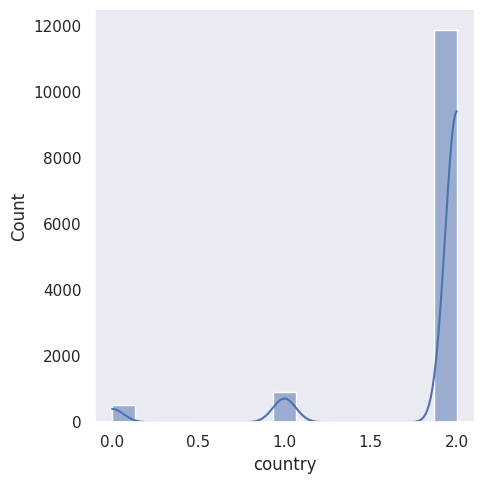

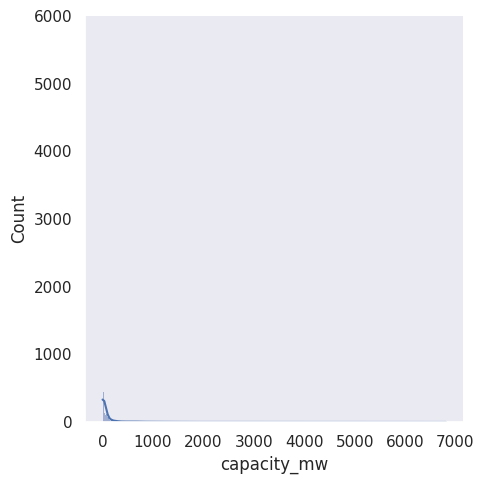

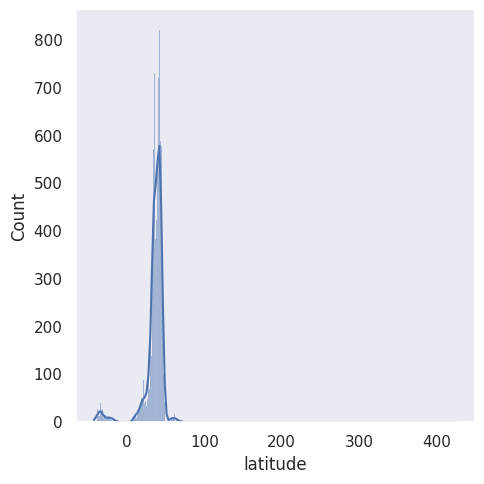

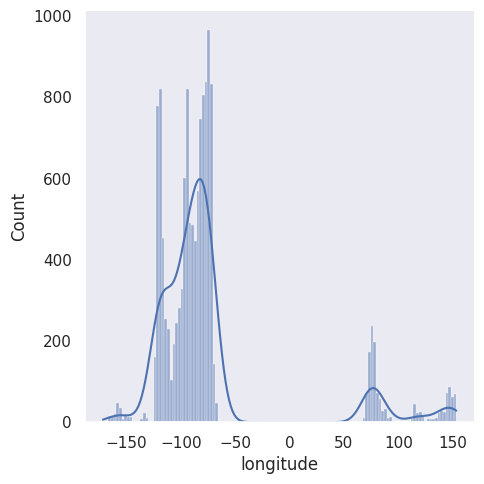

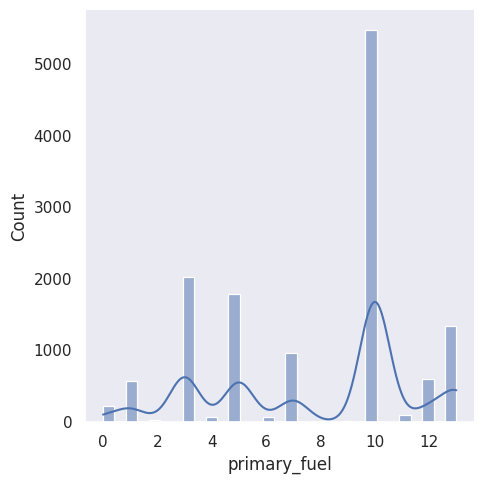

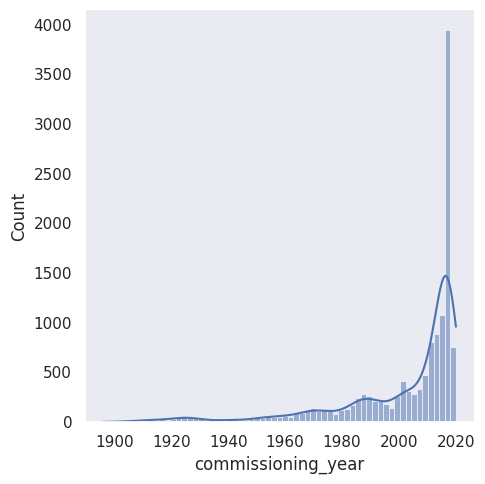

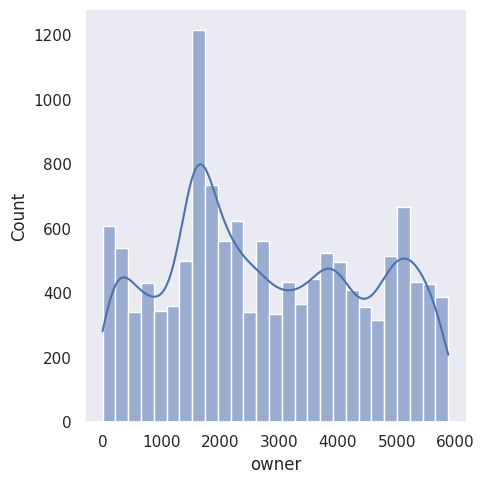

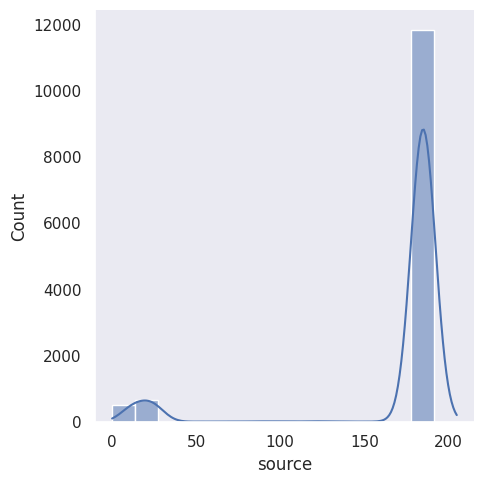

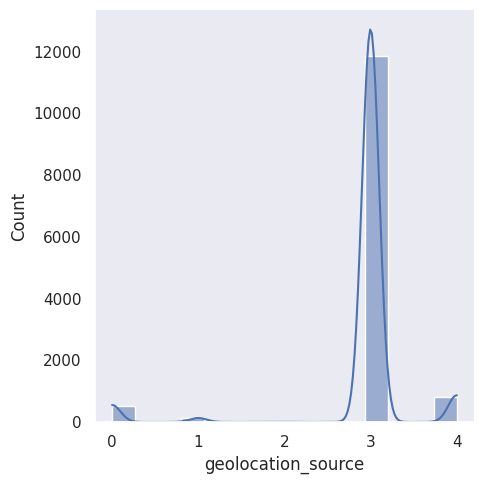

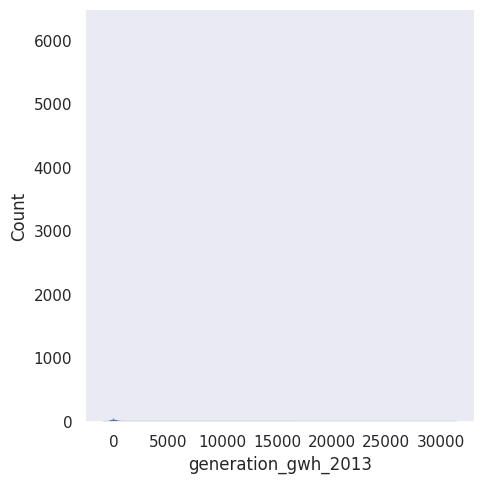

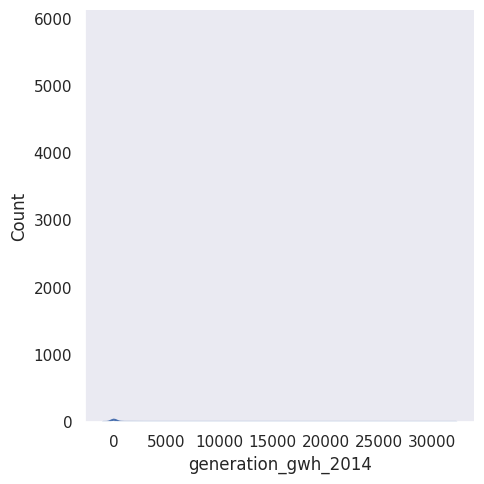

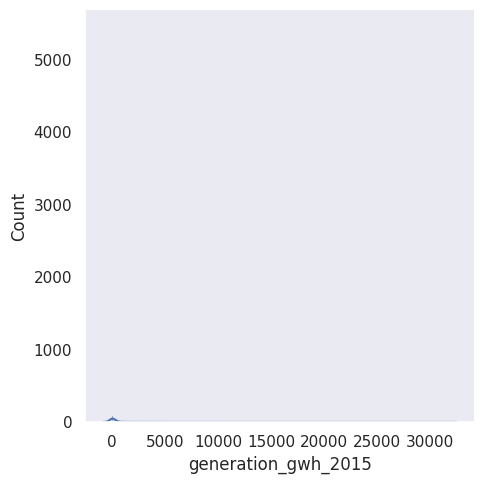

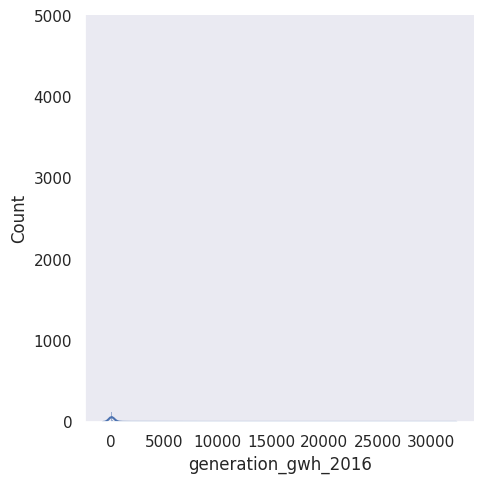

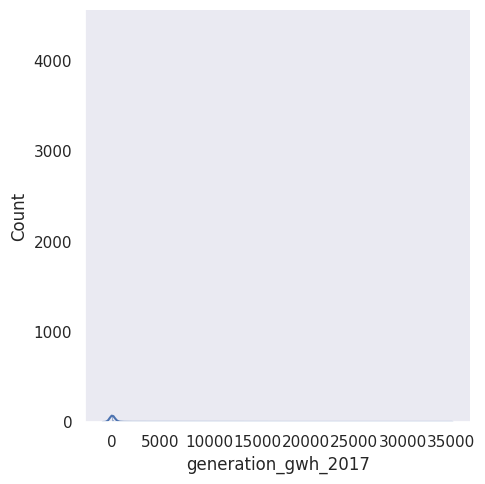

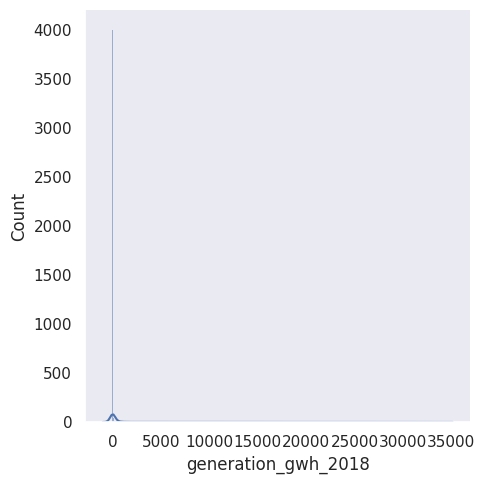

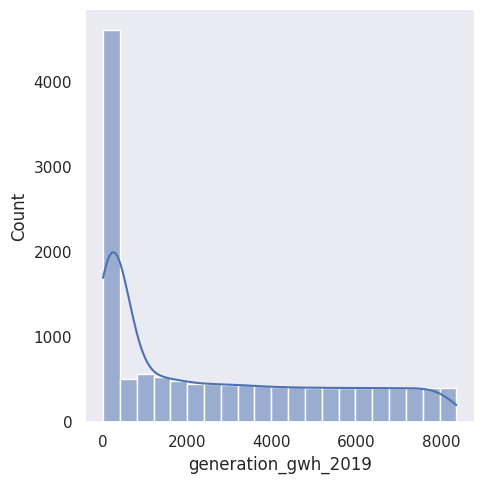

In [49]:
for i in df.columns.tolist()[:-1]:
  sns.displot(df[i],kde=True)


In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
df.skew()

country                  -3.166005
capacity_mw               5.474716
latitude                 -1.850290
longitude                 2.285187
primary_fuel             -0.419215
commissioning_year       -1.956042
owner                     0.146380
source                   -2.699669
geolocation_source       -3.293289
generation_gwh_2013       8.545859
generation_gwh_2014       8.089869
generation_gwh_2015       8.230533
generation_gwh_2016       8.288579
generation_gwh_2017       8.365803
generation_gwh_2018       8.298002
generation_gwh_2019       0.596762
generation_data_source   -4.533387
dtype: float64

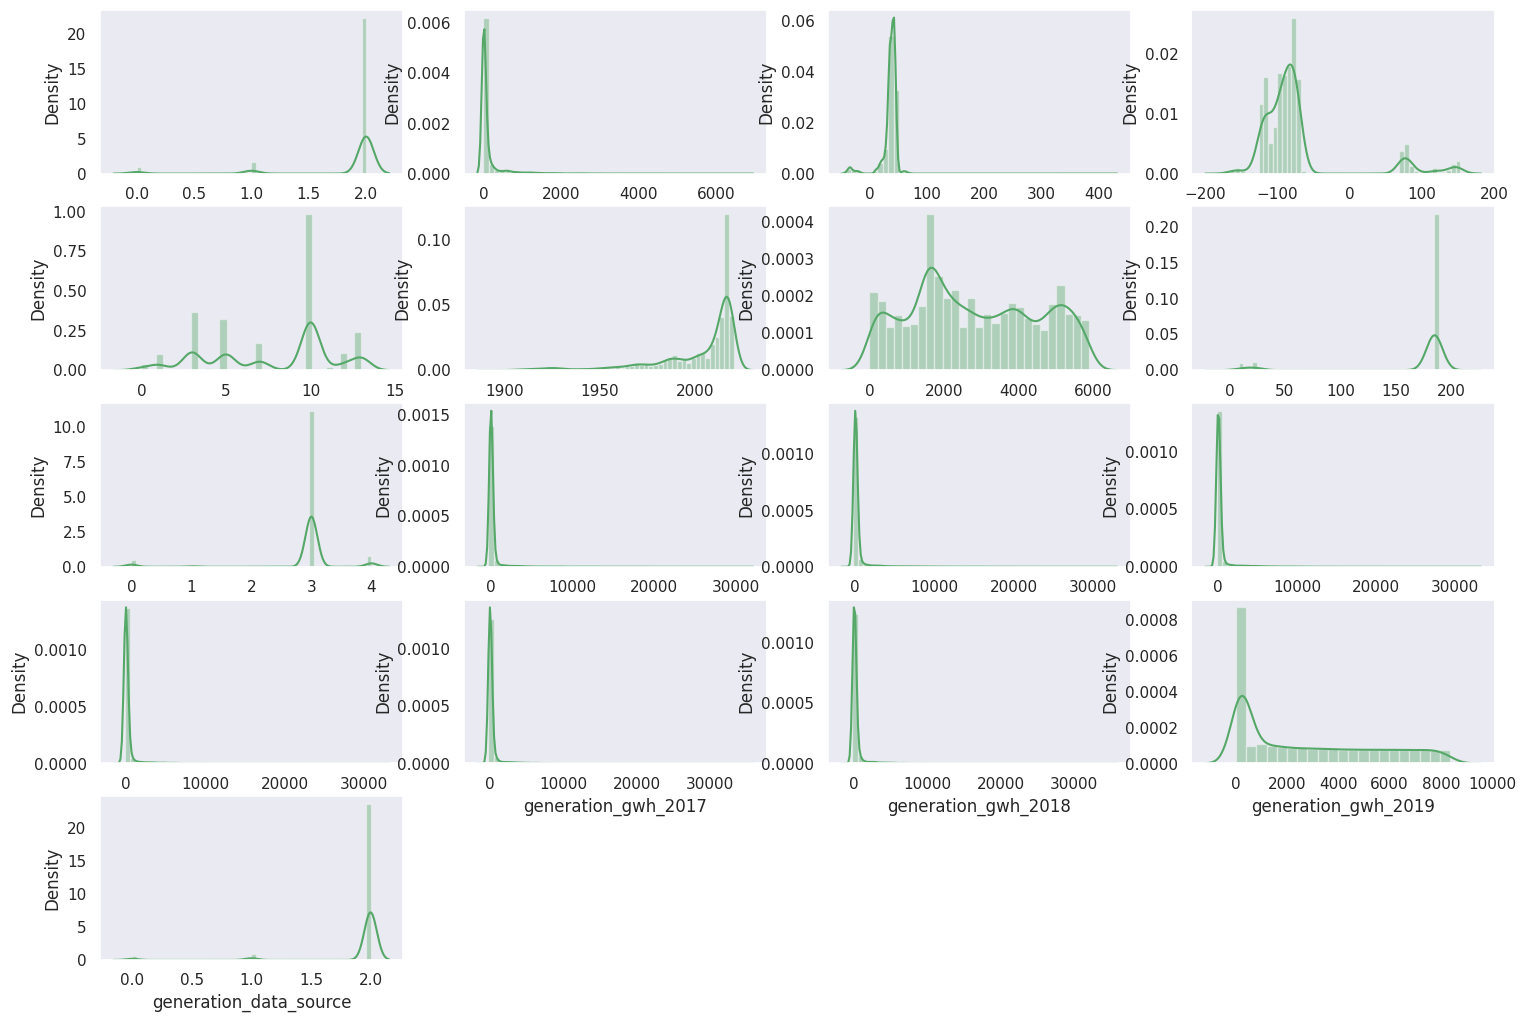

In [52]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(18,20))
for i in enumerate(df):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='g')


In [53]:
from scipy.stats import skew
skewnes_val=df.skew()
skewed_col=skewnes_val[abs(skewnes_val)>0.8].index.tolist()

In [54]:
skewed_col

['country',
 'capacity_mw',
 'latitude',
 'longitude',
 'commissioning_year',
 'source',
 'geolocation_source',
 'generation_gwh_2013',
 'generation_gwh_2014',
 'generation_gwh_2015',
 'generation_gwh_2016',
 'generation_gwh_2017',
 'generation_gwh_2018',
 'generation_data_source']

In [55]:
for i in skewed_col:
  q1 = df[i].quantile(0.25)
  q3 = df[i].quantile(0.75)
  IQR = q3 - q1
  outliers = df[(df[i] > q3 + 1.5 * IQR) | (df[i] < q1 - 1.5 * IQR)]
  df= df[~df[i].isin(outliers[i])]

In [56]:
df.skew()

country                    0.000000
capacity_mw                6.786643
latitude                  -0.340113
longitude                 -0.645104
primary_fuel              -3.917924
commissioning_year        -7.387279
owner                     -0.000989
source                     0.000000
geolocation_source         0.000000
generation_gwh_2013      -34.616920
generation_gwh_2014        0.000000
generation_gwh_2015        0.000000
generation_gwh_2016        0.000000
generation_gwh_2017        0.000000
generation_gwh_2018        0.000000
generation_gwh_2019        3.456897
generation_data_source     0.000000
dtype: float64

In [57]:
from sklearn.preprocessing import power_transform

df[['capacity_mw',"generation_gwh_2013",'generation_gwh_2019']]=power_transform(df[['capacity_mw',"generation_gwh_2013",'generation_gwh_2019']])

In [58]:
df.skew()

country                    0.000000
capacity_mw                0.933030
latitude                  -0.340113
longitude                 -0.645104
primary_fuel              -3.917924
commissioning_year        -7.387279
owner                     -0.000989
source                     0.000000
geolocation_source         0.000000
generation_gwh_2013       15.691579
generation_gwh_2014        0.000000
generation_gwh_2015        0.000000
generation_gwh_2016        0.000000
generation_gwh_2017        0.000000
generation_gwh_2018        0.000000
generation_gwh_2019       -0.390088
generation_data_source     0.000000
dtype: float64

In [59]:
X=df.drop(columns='primary_fuel',axis=1)
X

,country,capacity_mw,latitude,longitude,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,2,-0.651973,41.6327,-71.4963,2017.0,0,185,3,0.001781,22.241,19.504,15.410278,13.433861,12.3085,-0.464990,2
1,2,1.459582,41.0930,-73.9828,2016.0,1703,185,3,0.001781,22.241,19.504,15.410278,13.433861,12.3085,1.770185,2
2,2,-0.651973,36.2838,-80.8434,2017.0,1,185,3,0.001781,22.241,19.504,15.410278,13.433861,12.3085,-0.464990,2
3,2,-0.651973,36.2167,-80.5525,2017.0,2,185,3,0.001781,22.241,19.504,15.410278,13.433861,12.3085,-0.464990,2
4,2,-0.651973,36.1475,-80.6561,2017.0,3,185,3,0.001781,22.241,19.504,15.410278,13.433861,12.3085,-0.464990,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11850,2,-0.651973,34.5033,-82.2521,2017.0,5863,185,3,0.001781,22.241,19.504,15.410278,13.433861,12.3085,-0.464990,2
11852,2,-0.651973,34.0047,-118.0684,2017.0,4850,185,3,0.001781,22.241,19.504,15.410278,13.433861,12.3085,-0.464990,2
11858,2,-0.651973,35.2525,-89.2514,2017.0,2743,185,3,0.001781,22.241,19.504,15.410278,13.433861,12.3085,-0.464990,2
11868,2,-0.651973,41.0931,-83.6378,2017.0,3810,185,3,0.001781,22.241,19.504,15.410278,13.433861,12.3085,-0.464990,2


In [60]:
y=df['primary_fuel']
y

0        10
1        10
2        10
3        10
4        10
         ..
11850    10
11852    10
11858    10
11868    10
11876    10
Name: primary_fuel, Length: 2408, dtype: int64

# **Classification**

In [61]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score

In [62]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [63]:
df['primary_fuel'].value_counts()

primary_fuel
10    2199
3       78
7       37
11      33
13      24
12      17
5        8
0        5
6        4
4        2
2        1
Name: count, dtype: int64

In [64]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='all')
ros.fit(X_train, y_train)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [65]:
def classify(clf,X,y):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
  clf.fit(X_train,y_train)
  pred=clf.predict(X_test)
  acc=accuracy_score(y_test,pred)
  pre=precision_score(y_test,pred,average='micro')
  f1=f1_score(y_test,pred,average='micro')
  rec=recall_score(y_test,pred,average='micro')
  cv=cross_val_score(clf,X_train,y_train)
  print('Accuracy :',acc)
  print('Precision :',pre)
  print('F1-score :',f1)
  print('Recall :',rec)
  print('Cross - Val score :',cv)




In [66]:
X_train.shape,y_train.shape

((18183, 16), (18183,))

In [67]:
clf=RandomForestClassifier()
classify(clf,X,y)

Accuracy : 0.9485049833887044
Precision : 0.9485049833887044
F1-score : 0.9485049833887044
Recall : 0.9485049833887044
Cross - Val score : [0.96132597 0.94182825 0.94736842 0.96398892 0.96121884]


In [68]:
clf=KNeighborsClassifier()
classify(clf,X,y)

Accuracy : 0.9169435215946844
Precision : 0.9169435215946844
F1-score : 0.9169435215946844
Recall : 0.9169435215946844
Cross - Val score : [0.9281768  0.91966759 0.91966759 0.92520776 0.93074792]


In [69]:
clf=DecisionTreeClassifier()
classify(clf,X,y)

Accuracy : 0.9285714285714286
Precision : 0.9285714285714286
F1-score : 0.9285714285714286
Recall : 0.9285714285714286
Cross - Val score : [0.92541436 0.92243767 0.93628809 0.94459834 0.92797784]


In [70]:
clf=SVC()
classify(clf,X,y)

Accuracy : 0.9069767441860465
Precision : 0.9069767441860465
F1-score : 0.9069767441860465
Recall : 0.9069767441860465
Cross - Val score : [0.91436464 0.91689751 0.91689751 0.91412742 0.91412742]


In [71]:
clf=GaussianNB()
classify(clf,X,y)

Accuracy : 0.23255813953488372
Precision : 0.23255813953488372
F1-score : 0.23255813953488372
Recall : 0.23255813953488372
Cross - Val score : [0.24309392 0.21606648 0.87811634 0.24376731 0.29362881]


In [72]:
clf=BernoulliNB()
classify(clf,X,y)

Accuracy : 0.9069767441860465
Precision : 0.9069767441860465
F1-score : 0.9069767441860465
Recall : 0.9069767441860465
Cross - Val score : [0.91436464 0.91689751 0.91689751 0.91412742 0.91412742]


# **Regression**

In [73]:
X=df.drop(columns='capacity_mw',axis=1)
X

,country,latitude,longitude,primary_fuel,commissioning_year,owner,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,2,41.6327,-71.4963,10,2017.0,0,185,3,0.001781,22.241,19.504,15.410278,13.433861,12.3085,-0.464990,2
1,2,41.0930,-73.9828,10,2016.0,1703,185,3,0.001781,22.241,19.504,15.410278,13.433861,12.3085,1.770185,2
2,2,36.2838,-80.8434,10,2017.0,1,185,3,0.001781,22.241,19.504,15.410278,13.433861,12.3085,-0.464990,2
3,2,36.2167,-80.5525,10,2017.0,2,185,3,0.001781,22.241,19.504,15.410278,13.433861,12.3085,-0.464990,2
4,2,36.1475,-80.6561,10,2017.0,3,185,3,0.001781,22.241,19.504,15.410278,13.433861,12.3085,-0.464990,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11850,2,34.5033,-82.2521,10,2017.0,5863,185,3,0.001781,22.241,19.504,15.410278,13.433861,12.3085,-0.464990,2
11852,2,34.0047,-118.0684,10,2017.0,4850,185,3,0.001781,22.241,19.504,15.410278,13.433861,12.3085,-0.464990,2
11858,2,35.2525,-89.2514,10,2017.0,2743,185,3,0.001781,22.241,19.504,15.410278,13.433861,12.3085,-0.464990,2
11868,2,41.0931,-83.6378,10,2017.0,3810,185,3,0.001781,22.241,19.504,15.410278,13.433861,12.3085,-0.464990,2


In [74]:
y=df['capacity_mw']
y.dtype

dtype('float64')

In [75]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score


In [76]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=41)

In [77]:
model = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=0.0001),
    'Lasso': Lasso(alpha=0.0001),
    'ElasticNet': ElasticNet(alpha=0.0001),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'SVR': SVR()
}

In [78]:
for i,j in model.items():
  j.fit(X_train,y_train)
  pred=j.predict(X_test)
  mse=mean_squared_error(y_test,pred)
  r2=r2_score(y_test,pred)
  print(f' Model : {i}')
  print(f' MSE is {mse}')
  print(f' R-Score is {r2}')
  print(f' Score is {j.score(X_test,y_test)}')
  print('\n')


 Model : LinearRegression
 MSE is 0.4783242585168114
 R-Score is 0.5142421252615011
 Score is 0.5142421252615011


 Model : Ridge
 MSE is 0.47832425785316074
 R-Score is 0.5142421259354655
 Score is 0.5142421259354655


 Model : Lasso
 MSE is 0.4783229066693021
 R-Score is 0.5142434981180131
 Score is 0.5142434981180131


 Model : ElasticNet
 MSE is 0.47832293558671507
 R-Score is 0.5142434687511958
 Score is 0.5142434687511958


 Model : DecisionTreeRegressor
 MSE is 0.05347640000770477
 R-Score is 0.9456925256164997
 Score is 0.9456925256164997


 Model : RandomForestRegressor
 MSE is 0.051454728612543715
 R-Score is 0.9477456157177172
 Score is 0.9477456157177172


 Model : GradientBoostingRegressor
 MSE is 0.05040816685922323
 R-Score is 0.9488084420411237
 Score is 0.9488084420411237


 Model : SVR
 MSE is 1.268241979531037
 R-Score is -0.2879516722430482
 Score is -0.2879516722430482




In [79]:
best_model = max(model.values(), key=lambda j: j.score(X_test, y_test))
print(f' Best Model is {best_model} with Score {best_model.score(X_test,y_test)}')

 Best Model is GradientBoostingRegressor() with Score 0.9488084420411237
